<a href="https://colab.research.google.com/github/chinnisaimohan/DAI-Assignment-1-23114020-/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> 1. Data Cleaning

<h3> 1.1 Load the Dataset and Inspect Its Structure

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('titanic.csv')

# Inspect the first few rows
print(df.head())

# Check data types and missing values
print(df.info())

# Print Shape of DataFrame
print("Shape of Data Frame : ", df.shape, end=" \n\n")


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

<h3>1.2 Handle missing values using imputation or removal techniques.


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Impute missing values for 'Age' with the median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Impute missing values for 'Embarked' with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop the 'Cabin' column as it has too many missing values
df = df.drop(columns=['Cabin'])


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<h3>1.3 Identify and Remove Duplicate Records
Check for duplicate rows and remove them if necessary.

In [ ]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df.drop_duplicates(inplace=True)

0


<h3>1.4 Detect and treat outliers using appropriate statistical methods.

In [ ]:
import numpy as np

# Detect outliers in 'Fare' using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
print(outliers)

# Remove outliers (optional)
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

     PassengerId  Survived  Pclass  \
1              2         1       1   
27            28         0       1   
31            32         1       1   
34            35         0       1   
52            53         1       1   
..           ...       ...     ...   
846          847         0       3   
849          850         1       1   
856          857         1       1   
863          864         0       3   
879          880         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
27                      Fortune, Mr. Charles Alexander    male  19.0      3   
31      Spencer, Mrs. William Augustus (Marie Eugenie)  female  28.0      1   
34                             Meyer, Mr. Edgar Joseph    male  28.0      1   
52            Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   
..                                                 ...     ...   ... 

<h3>1.5 Standardize categorical values (e.g., fixing typos or formatting inconsistencies).

In [ ]:
# Standardize 'Sex' column
df['Sex'] = df['Sex'].str.lower()

# Standardize 'Embarked' column
df['Embarked'] = df['Embarked'].str.upper()

<h1>2. Exploratory Data Analysis (EDA)

<h2>2.1 Univariate Analysis




<h3>2.1.1 Summary Statistics: Calculate mean, median, mode, variance, skewness, etc.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  



<h3> 2.1.2 Frequency Distributions: For categorical variables.



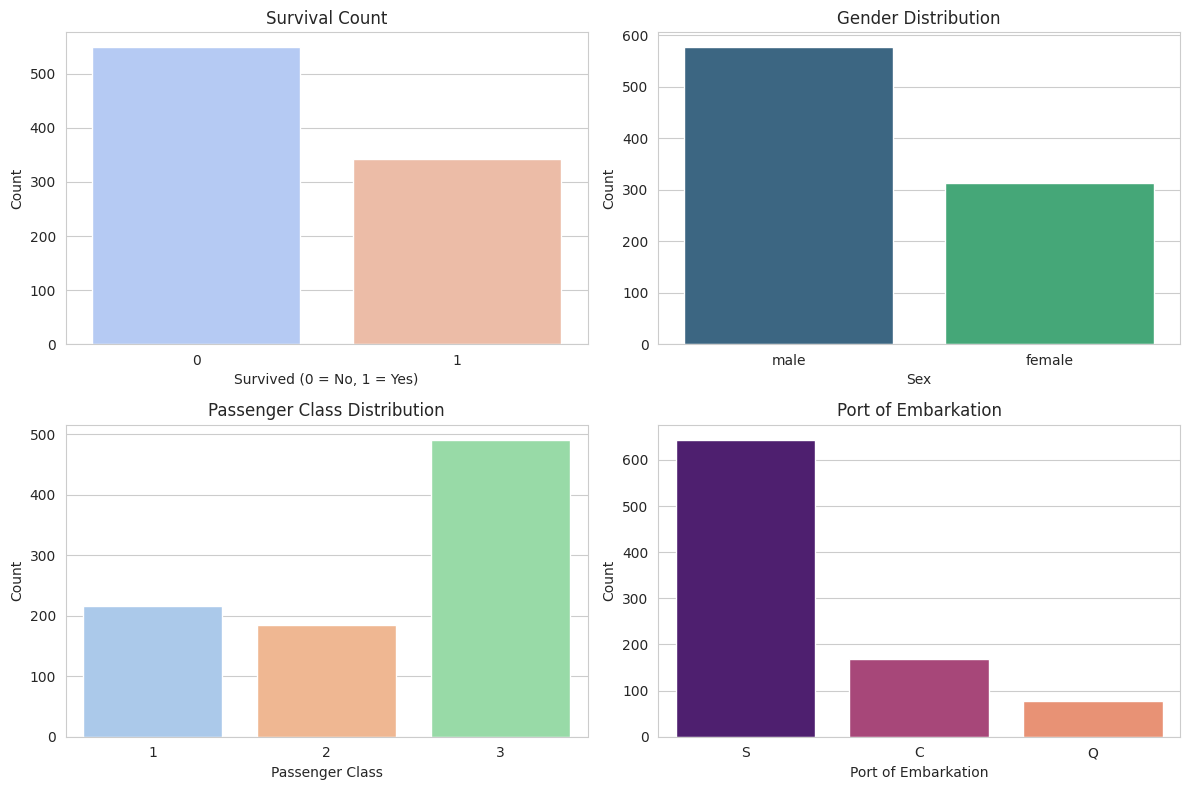

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create count plots for categorical variables
plt.figure(figsize=(12, 8))

# Survived count plot
plt.subplot(2, 2, 1)
sns.countplot(x="Survived", data=df, hue="Survived", palette='coolwarm', legend=False)
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Survival Count')

# Sex count plot
plt.subplot(2, 2, 2)
sns.countplot(x="Sex", data=df, hue="Sex", palette='viridis', legend=False)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Gender Distribution')

# Pclass count plot
plt.subplot(2, 2, 3)
sns.countplot(x="Pclass", data=df, hue="Pclass", palette='pastel', legend=False)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Passenger Class Distribution')

# Embarked count plot
plt.subplot(2, 2, 4)
sns.countplot(x="Embarked", data=df, hue="Embarked", palette='magma', legend=False)
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.title('Port of Embarkation')

plt.tight_layout()
plt.show()


<h3>2.1.3 Histograms and Box Plots: To visualize distributions.


Sex
male      577
female    314
Name: count, dtype: int64


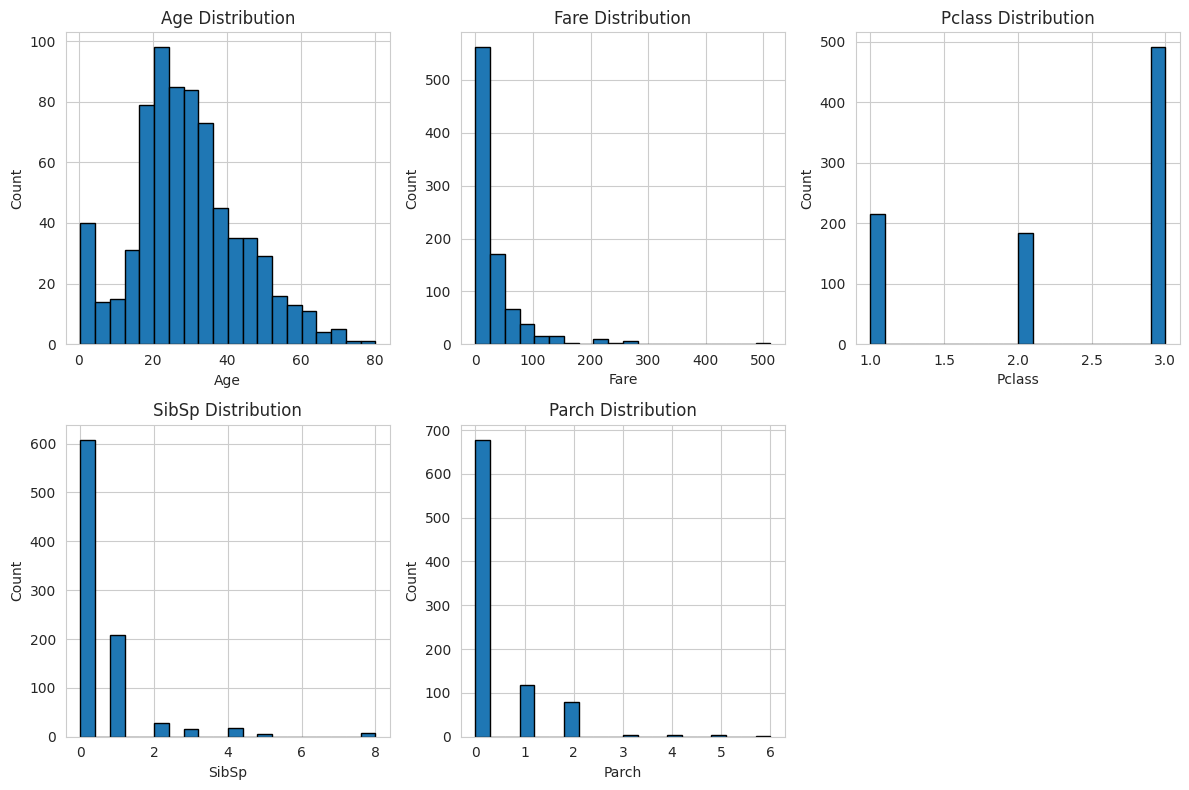

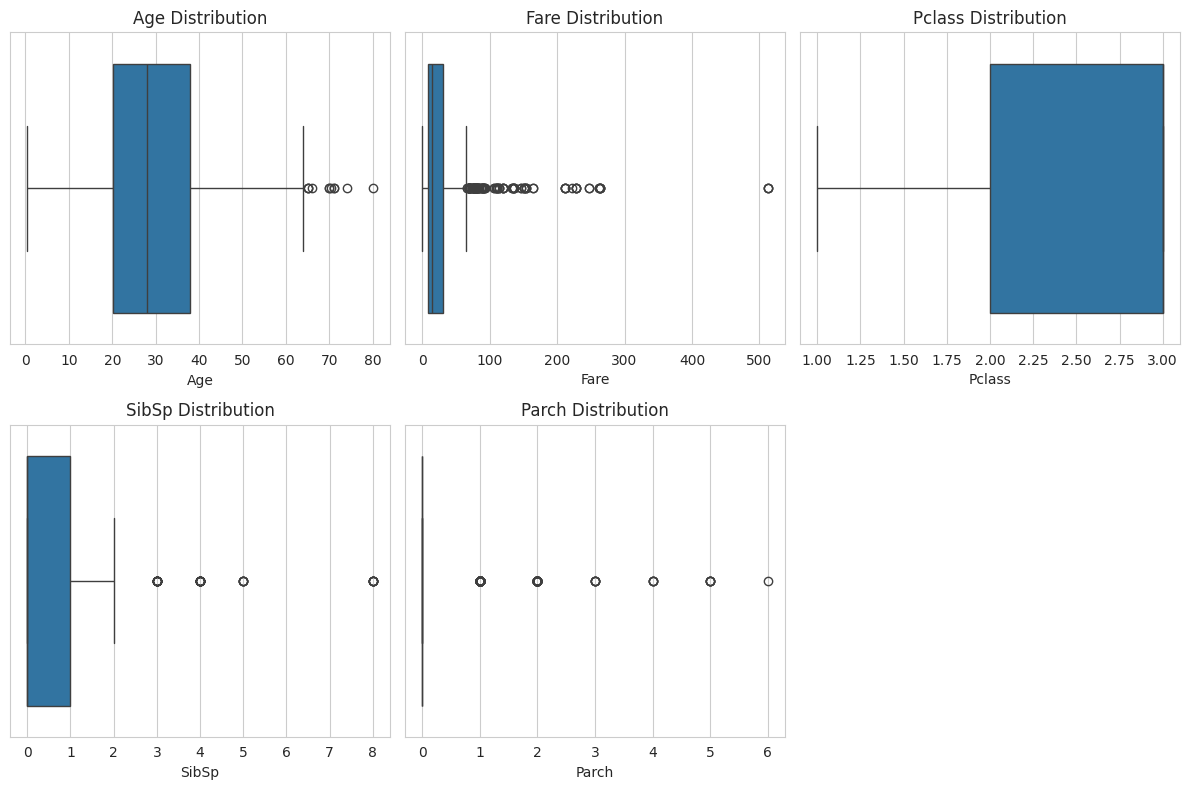

In [ ]:
# Frequency distribution for 'Sex'
print(df['Sex'].value_counts())

# List of numerical columns for histograms and box plots
num_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']

# **Histograms for numerical variables**
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # Arrange in a 2-row, 3-column grid
    plt.hist(df[col].dropna(), bins=20, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

# **Box plots for numerical variables**
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)  # Arrange in a 2-row, 3-column grid
    sns.boxplot(x=df[col])
    plt.xlabel(col)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


<h2> 2.2 Bivariate Analysis </h2>


<h3> 2.2.1 Correlation matrix to identify relationships between numerical variables.


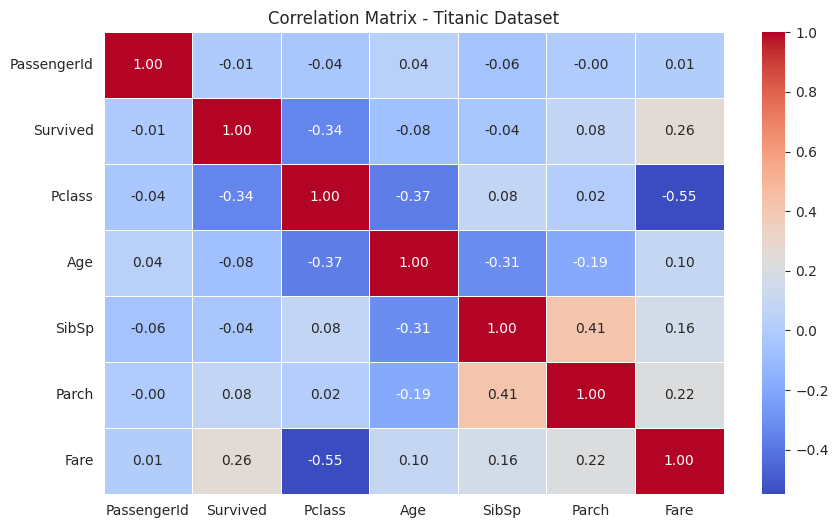

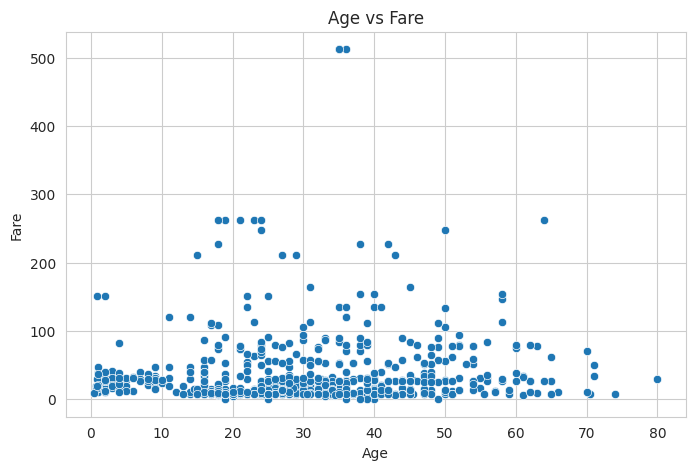

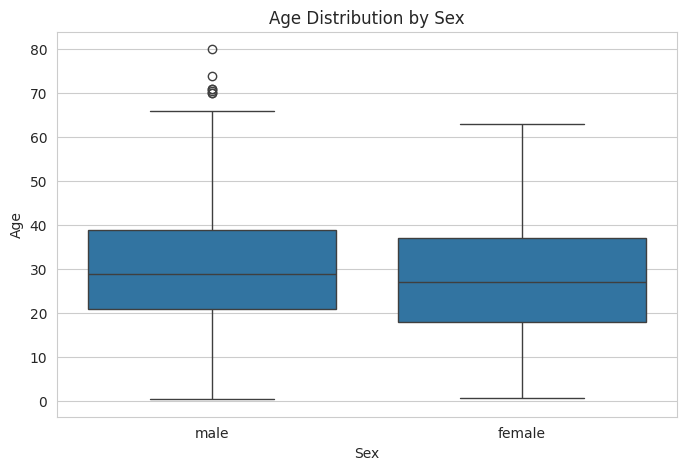

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number']).copy()

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix - Titanic Dataset')
plt.show()



# Box plot for 'Sex' vs 'Age' (ensure 'Sex' is categorical)
if 'Sex' in df.columns and 'Age' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Sex', y='Age', data=df)
    plt.title('Age Distribution by Sex')
    plt.show()
else:
    print("Columns 'Sex' or 'Age' not found in DataFrame.")


<h3> 2.2.2 Scatter plots for continuous variable relationships.

<Figure size 1200x800 with 0 Axes>

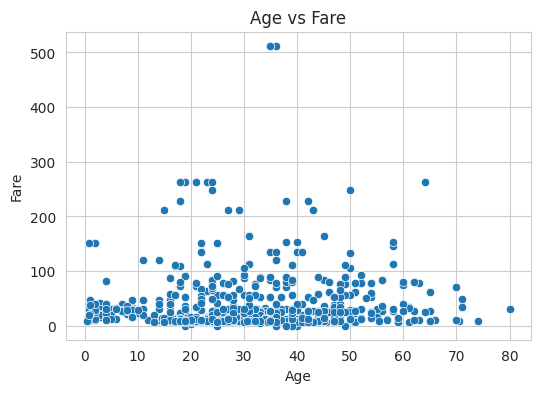

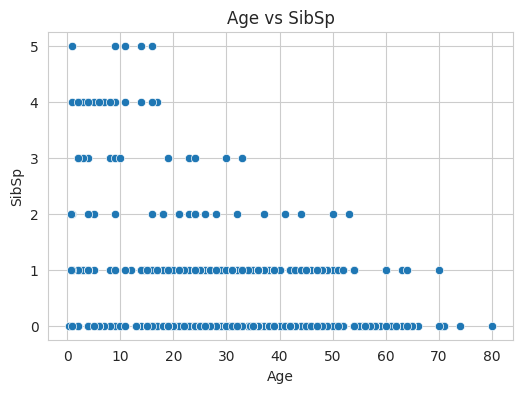

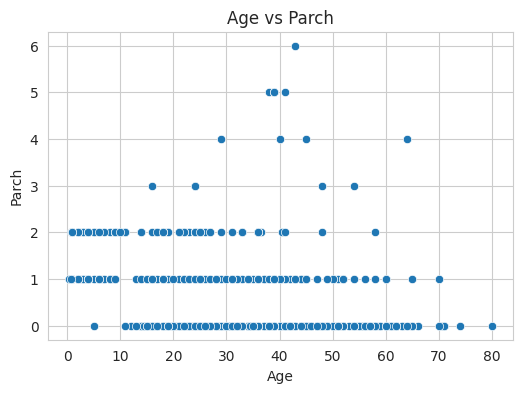

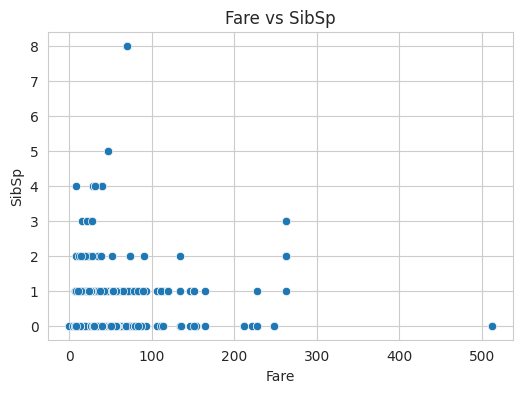

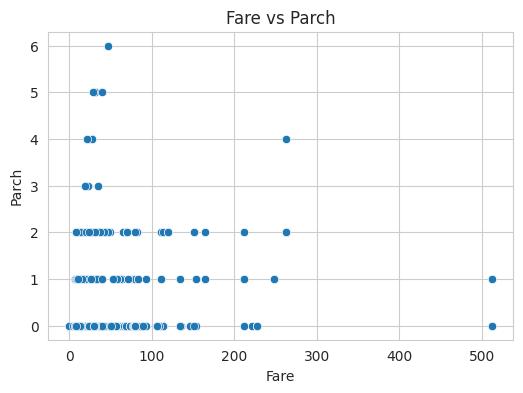

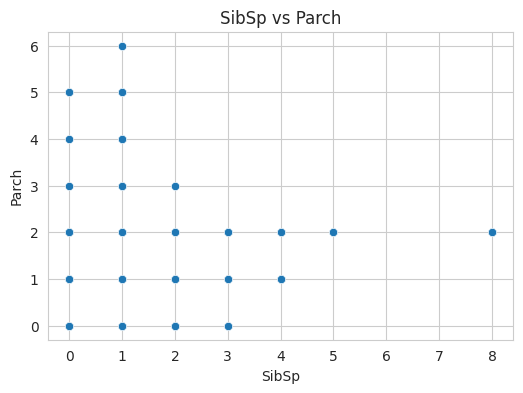

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define continuous numerical columns (excluding categorical ones like 'Survived', 'Pclass')
continuous_vars = ['Age', 'Fare', 'SibSp', 'Parch']

# Generate scatter plots for each pair
plt.figure(figsize=(12, 8))
for i in range(len(continuous_vars)):
    for j in range(i + 1, len(continuous_vars)):
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[continuous_vars[i]], y=df[continuous_vars[j]])
        plt.title(f'{continuous_vars[i]} vs {continuous_vars[j]}')
        plt.show()


<h3> 2.2.3 Bar plots, violin plots, and box plots to compare categorical and numerical variables.

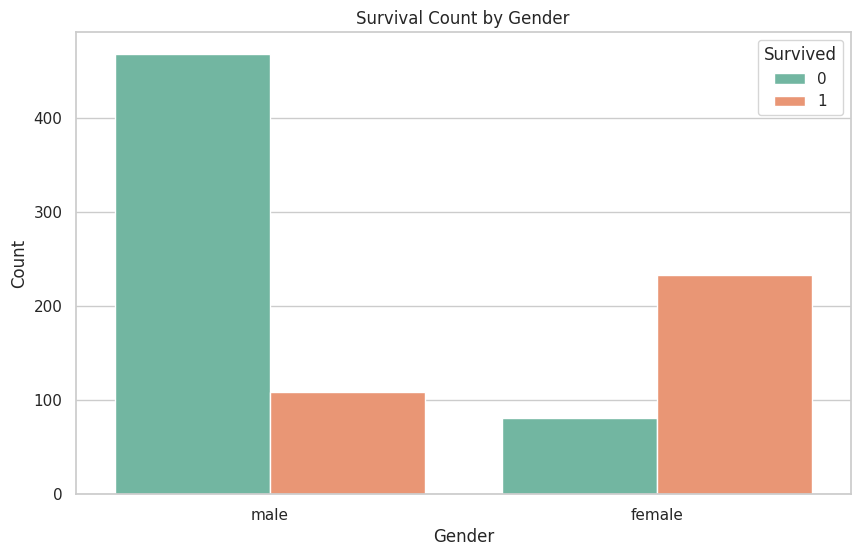

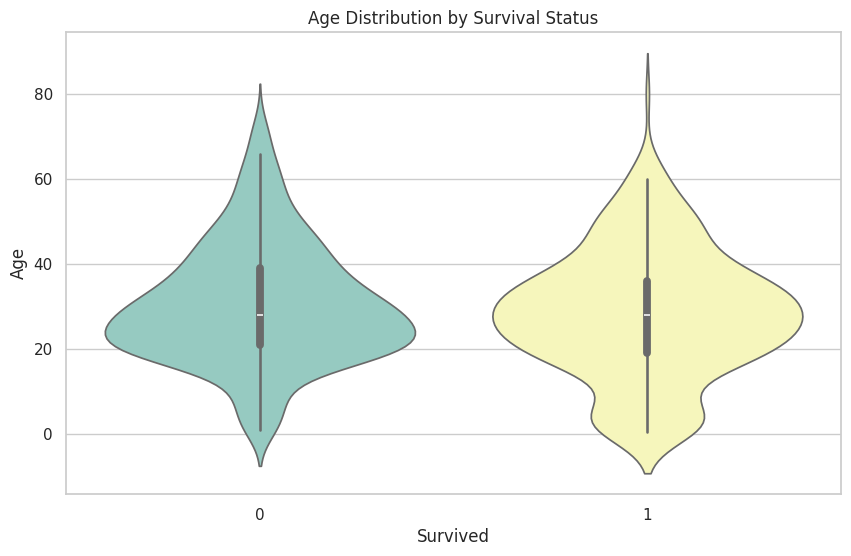

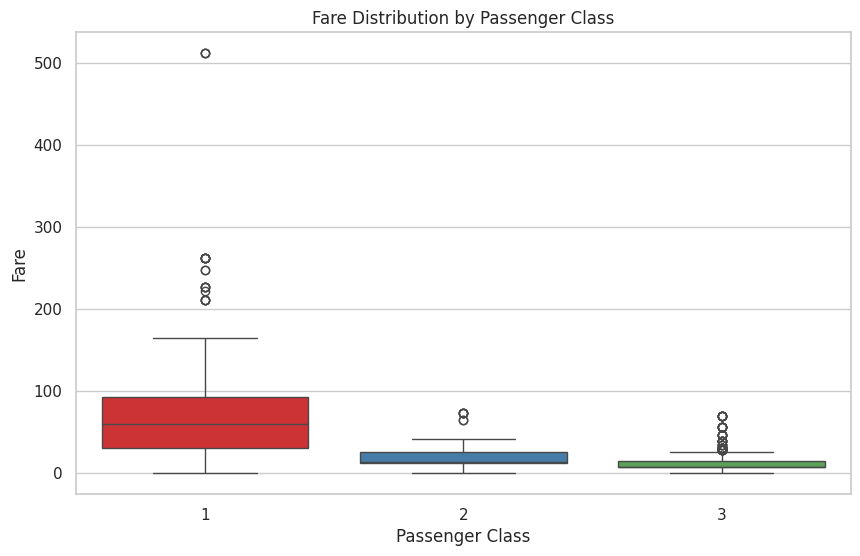

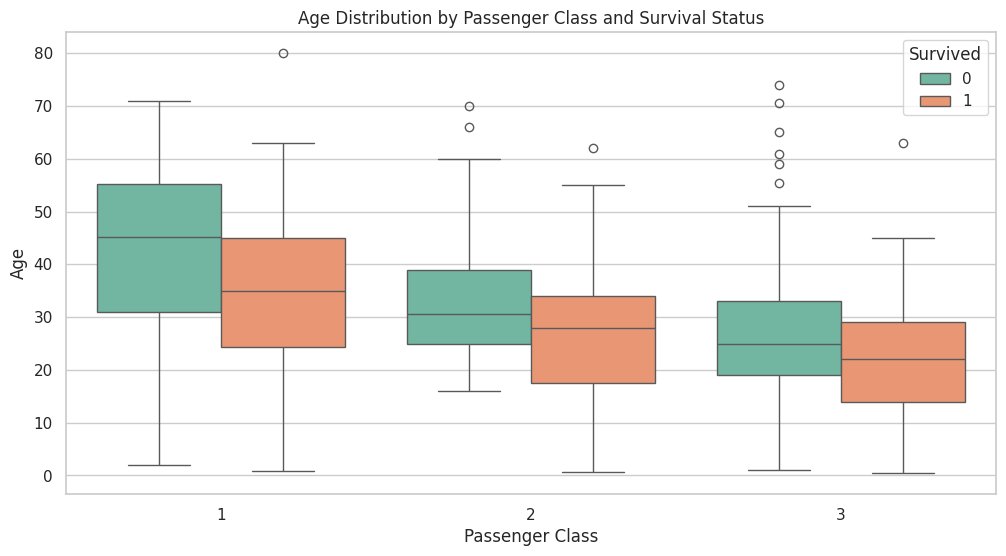

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Bar Plot: Survival Count by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

# Violin Plot: Age Distribution by Survival Status (Fixed Warning)
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=df, hue='Survived', palette='Set3', legend=False)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Box Plot: Fare Distribution by Passenger Class (Fixed Warning)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, hue='Pclass', palette='Set1', legend=False)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

# Box Plot: Age Distribution by Passenger Class and Survival Status
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df, palette='Set2')
plt.title('Age Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.legend(title='Survived', loc='upper right')
plt.show()


<h2>2.3 Multivariate Analysis


<h3>2.3.1 Pair plots to analyze multiple relationships simultaneously.

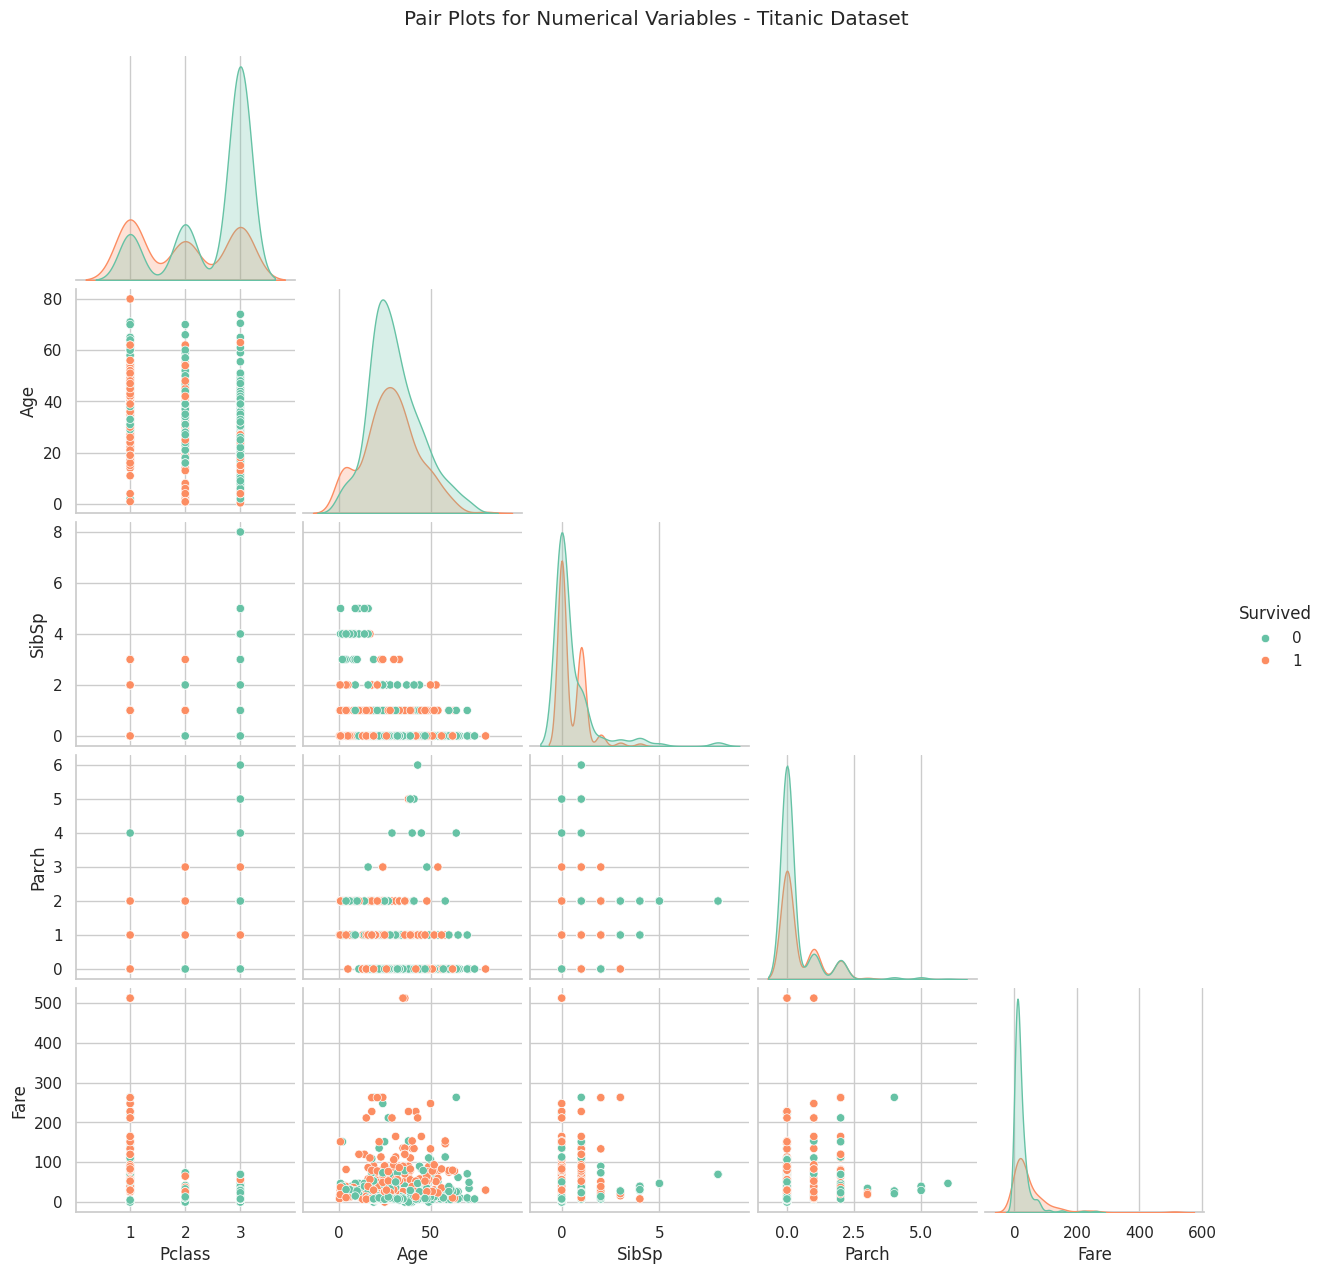

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for pair plots
numeric_df = df.select_dtypes(include=['number'])

# Drop 'PassengerId' as it's just an identifier
numeric_df = numeric_df.drop(columns=['PassengerId'], errors='ignore')

# Add a categorical column (e.g., 'Survived') for hue
numeric_df['Survived'] = df['Survived']

# Create pair plots with a hue variable
sns.pairplot(numeric_df, hue='Survived', diag_kind='kde', corner=True, palette='Set2')
plt.suptitle('Pair Plots for Numerical Variables - Titanic Dataset', y=1.02)
plt.show()

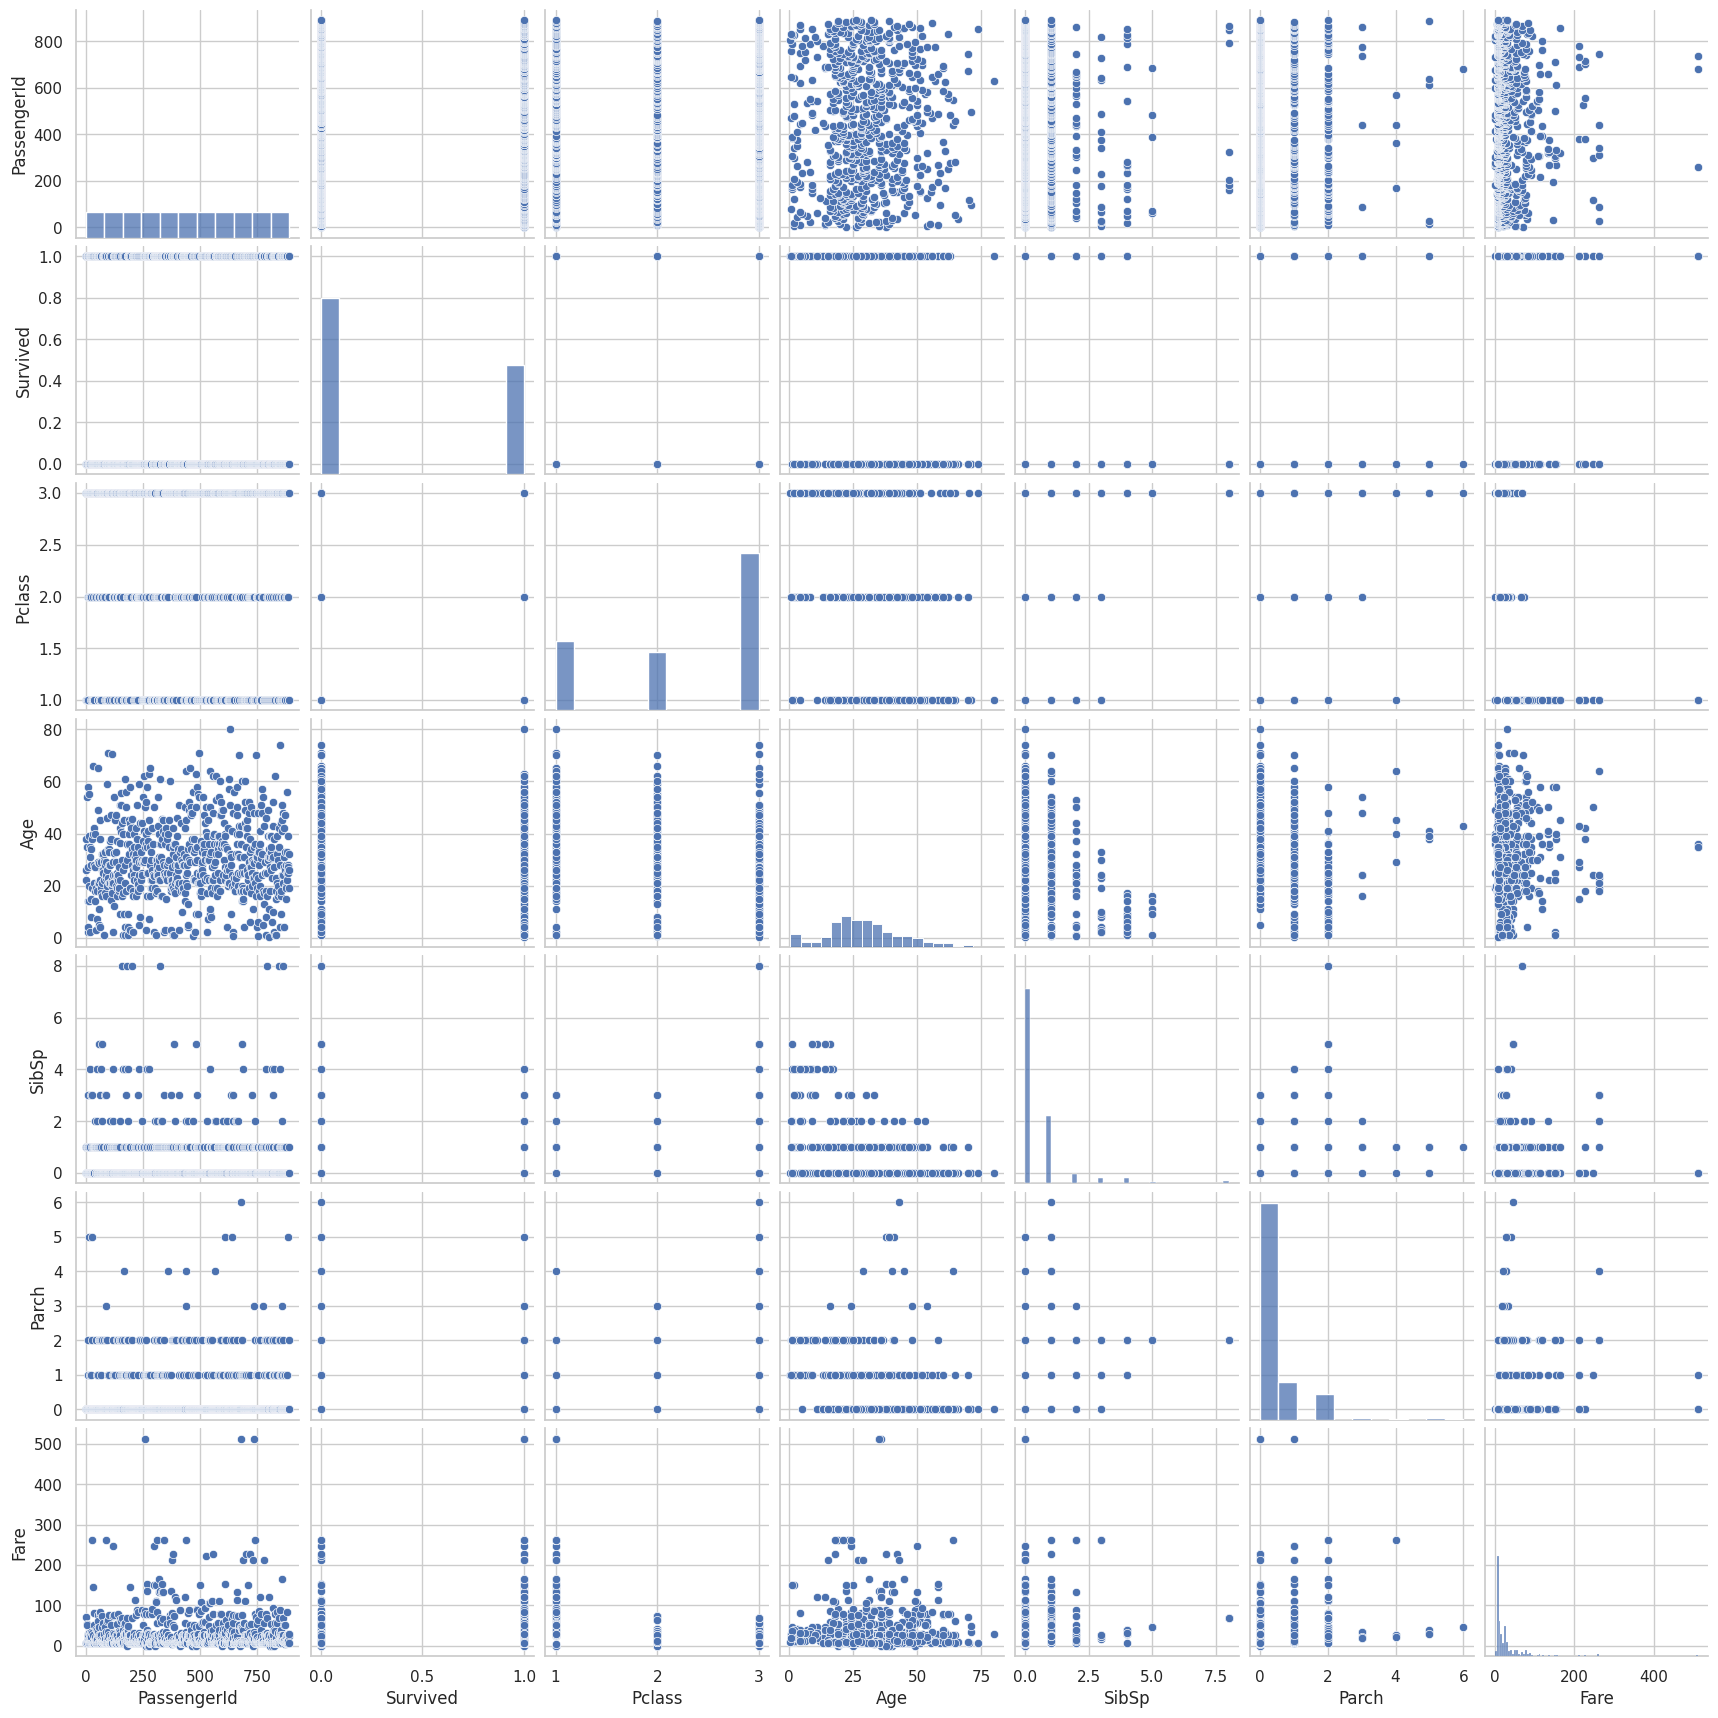

In [ ]:
# Pair plot (Handles only numerical columns)
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()



<h3> 2.3.2 Heatmaps to visualize correlations among multiple variables.

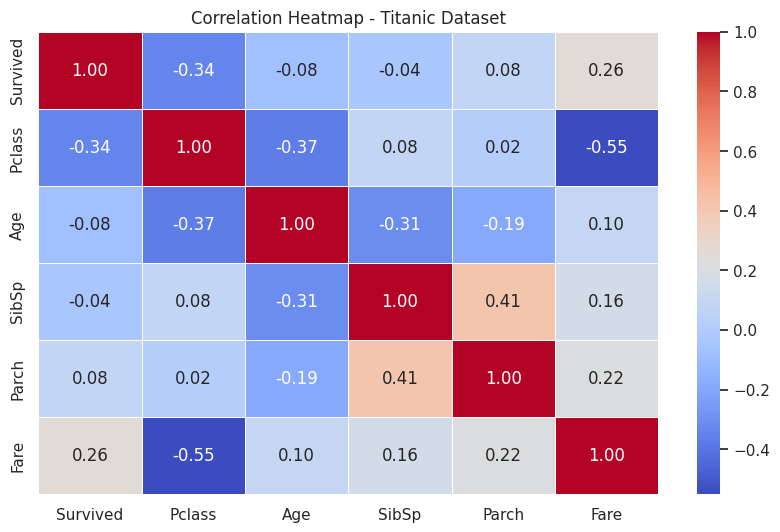

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Drop 'PassengerId' if present (not useful for correlation)
numeric_df = numeric_df.drop(columns=['PassengerId'], errors='ignore')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - Titanic Dataset')
plt.show()


<h3>2.3.3 Grouped comparisons to identify combined effects of multiple features.

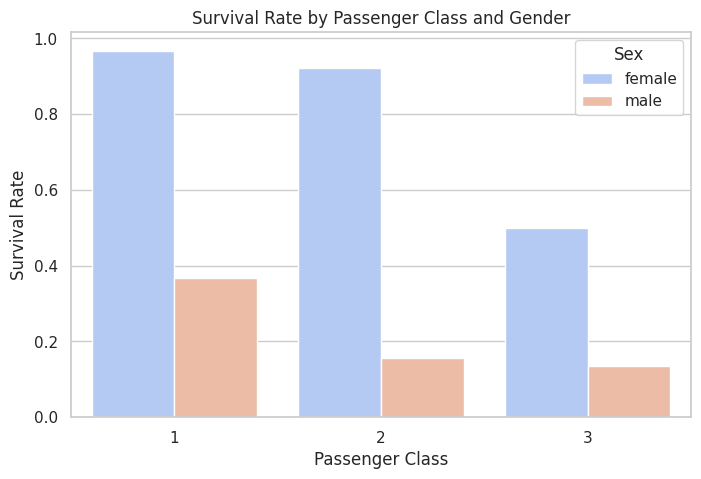

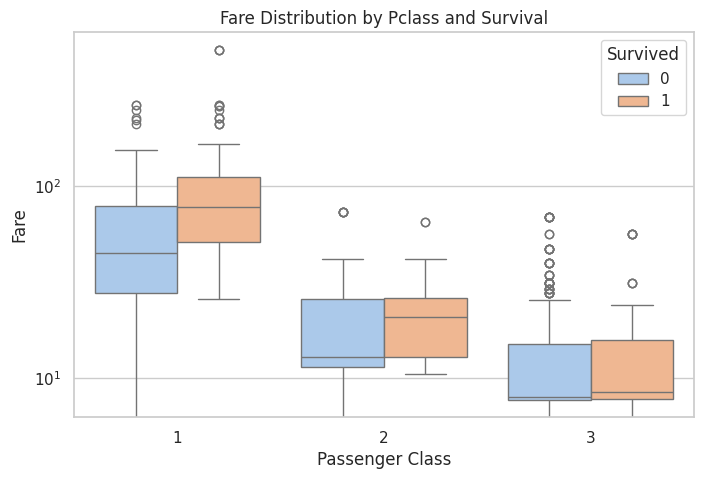

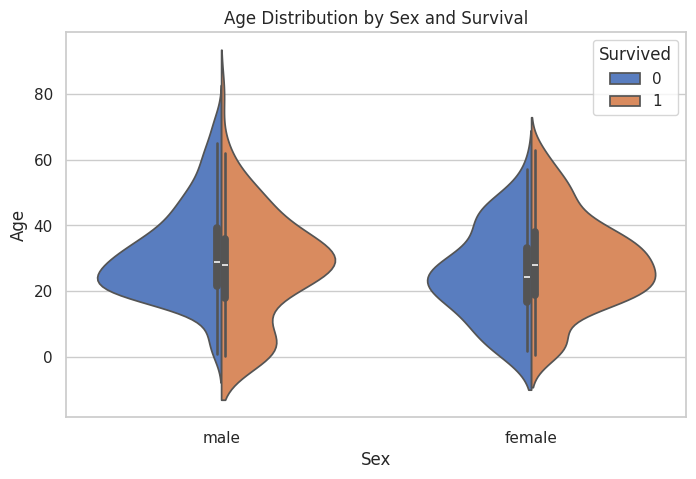

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped bar plot: Survival rate by Pclass and Sex (Fixed ci warning)
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, errorbar=None, palette='coolwarm')
plt.title('Survival Rate by Passenger Class and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.legend(title='Sex')
plt.show()

# Grouped box plot: Fare distribution by Pclass and Survived
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df, palette='pastel')
plt.title('Fare Distribution by Pclass and Survival')
plt.ylabel('Fare')
plt.xlabel('Passenger Class')
plt.legend(title='Survived')
plt.yscale('log')  # Log scale to handle outliers in fare
plt.show()

# Grouped violin plot: Age distribution by Sex and Survived
plt.figure(figsize=(8, 5))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette='muted')
plt.title('Age Distribution by Sex and Survival')
plt.ylabel('Age')
plt.xlabel('Sex')
plt.legend(title='Survived')
plt.show()
